#Demonstration: Visualize and Reduce High-Dimensional Data using t-SNE and UMAP

##Scenario

- A data analyst at an e-commerce company is tasked with understanding customer preferences by analyzing image embeddings of products (Fashion MNIST). Since these images are high-dimensional (28x28 = 784 features), the analyst uses t-SNE and UMAP to visually cluster similar items and extract valuable behavioral insights for marketing and recommendations.

##Step 1: Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
import umap
from tensorflow.keras.datasets import fashion_mnist

import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA

##Step 2: Load and Preprocess the Dataset

We use a sample of 3000 images to reduce computation. The images are flattened and normalized. Labels are mapped to human-readable names.



In [2]:
# Load Fashion MNIST dataset (images and labels)
(train_images, train_labels), _ = fashion_mnist.load_data()

# Normalize the images and take a sample subset for faster execution
images = train_images[:3000] / 255.0
labels = train_labels[:3000]

# Flatten the 28x28 images into 784-length vectors
images_flat = images.reshape((images.shape[0], -1))

# Convert numerical labels to readable class names
label_map = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
             'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
label_names = [label_map[label] for label in labels]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


##Step 3: Show Sample Images with Their Labels

Visual preview of 10 images from the dataset along with their class names to help learners relate images to the category.



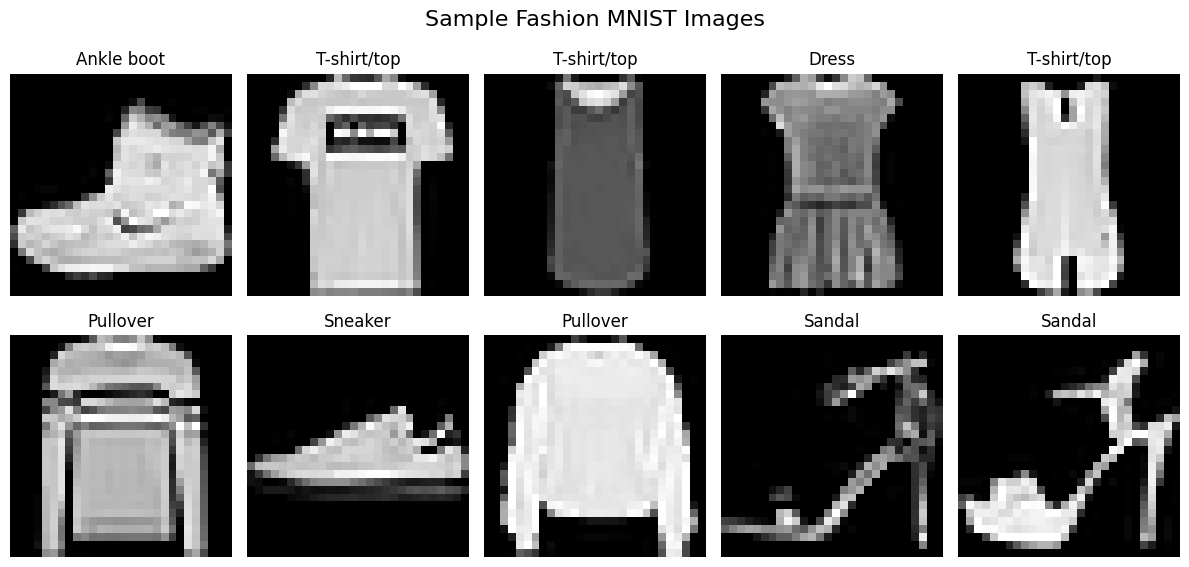

In [3]:
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(label_names[i])
    plt.axis('off')
plt.suptitle("Sample Fashion MNIST Images", fontsize=16)
plt.tight_layout()
plt.show()

##Step 4: Apply t-SNE for Dimensionality Reduction

We apply t-SNE to reduce the 784-dimensional data to 2D. It captures local relationships well and helps in cluster discovery.

In [4]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(images_flat)

# Prepare a DataFrame for Plotly visualization
tsne_df = pd.DataFrame()
tsne_df['TSNE-1'] = tsne_result[:, 0]
tsne_df['TSNE-2'] = tsne_result[:, 1]
tsne_df['Label'] = label_names

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


##Step 5: Interactive Visualization using t-SNE

This is an interactive plot where each dot is a product. Colors represent product categories. You can zoom in, hover, and explore.

In [5]:
fig = px.scatter(tsne_df, x='TSNE-1', y='TSNE-2', color='Label',
                 title="t-SNE: 2D Projection of Fashion MNIST",
                 labels={"Label": "Category"}, width=900, height=600)
fig.show()

##Step 6: Apply UMAP for Dimensionality Reduction

UMAP is another powerful method that preserves both local and global structure. It tends to form more compact clusters and is faster than t-SNE.



In [6]:
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
umap_result = umap_model.fit_transform(images_flat)

# Create DataFrame
umap_df = pd.DataFrame()
umap_df['UMAP-1'] = umap_result[:, 0]
umap_df['UMAP-2'] = umap_result[:, 1]
umap_df['Label'] = label_names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



##Step 7: Visualize UMAP Clusters Interactively

Interactive UMAP scatter plot showing how product categories group in reduced dimensions. This helps spot overlapping vs. distinct classes.



In [7]:
fig = px.scatter(umap_df, x='UMAP-1', y='UMAP-2', color='Label',
                 title="UMAP: 2D Projection of Fashion MNIST",
                 labels={"Label": "Category"}, width=900, height=600)
fig.show()

##Step 8: Compare with PCA (Baseline)

PCA is a linear dimensionality reduction technique. It's useful for comparison, but often misses nonlinear patterns that UMAP and t-SNE can detect.

In [8]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(images_flat)

pca_df = pd.DataFrame()
pca_df['PCA-1'] = pca_result[:, 0]
pca_df['PCA-2'] = pca_result[:, 1]
pca_df['Label'] = label_names

fig = px.scatter(pca_df, x='PCA-1', y='PCA-2', color='Label',
                 title="PCA: 2D Projection of Fashion MNIST",
                 labels={"Label": "Category"}, width=900, height=600)
fig.show()

##Cluster Density Heatmap using t-SNE

Shows the density of clusters visually, revealing areas with high product concentration — ideal for understanding core vs. outlier products.

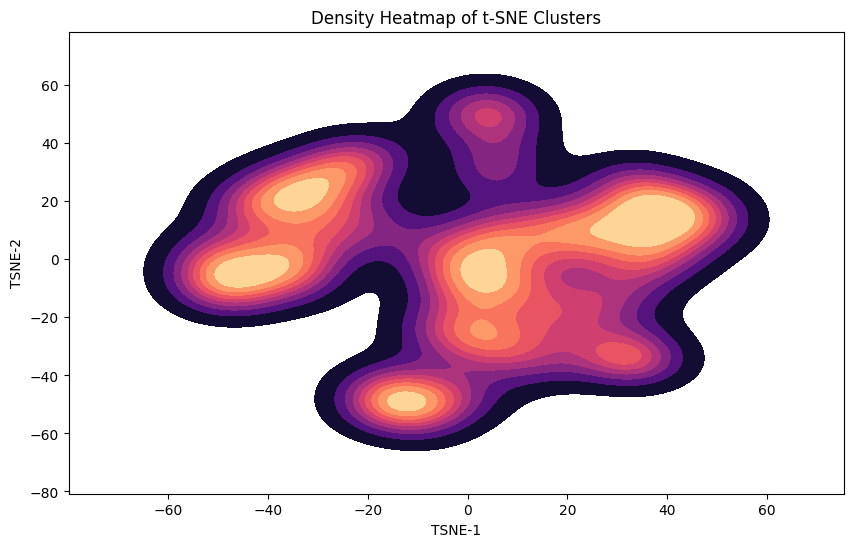

In [9]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=tsne_df["TSNE-1"], y=tsne_df["TSNE-2"], cmap="magma", fill=True, thresh=0.05)
plt.title("Density Heatmap of t-SNE Clusters")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.show()

##Step 10: Show Category Centroids in UMAP Space

This plot shows the average location of each product category in the 2D UMAP space, helping analysts see how categories are distributed and how close they are.

In [10]:
centroids = umap_df.groupby("Label")[["UMAP-1", "UMAP-2"]].mean().reset_index()

fig = px.scatter(umap_df, x='UMAP-1', y='UMAP-2', color='Label', opacity=0.6)
fig.add_trace(go.Scatter(
    x=centroids['UMAP-1'], y=centroids['UMAP-2'],
    mode='markers+text', text=centroids['Label'],
    marker=dict(color='black', size=10, symbol='x'),
    name='Centroids'
))
fig.update_layout(title="UMAP with Category Centroids", width=900, height=600)
fig.show()